In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import datetime as dt
import re, os, random
import joblib

from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



import graphviz 
from sklearn import tree



import warnings
warnings.filterwarnings("ignore")

In [2]:
MALE = 'male'
FEMALE = 'female'
CONTRIBUTORS = 'CONTRIBUTORS'
TARGET = 'TARGET'
MODEL = 'model'

In [28]:
ID = 'national_id_number'
LAST_JOB = 'last_job_c'
FIRST_JOB = 'first_job'
EXPERIENCE = 'experience'
AGE = 'age'
GOVERNORATE = 'governorate'
DISABILITY = 'disability'
GENDER = 'gender'
EDUCATION = 'education'
UNEMPLOYMENT_YAER = 'unemployment_year'
SAME_JOB = 'same_job'
WAGE = 'wage_adj_c'
POVERTY = 'poverty'
INDUSTRY = 'industry'
SPELL = 'unemployment_spell'
# EMPLOYMENT = 'employment'


NODES = 'nodes'
CLUSTERS = 'clusters'

In [29]:
ORIGINAL_COLUMNS = ['NationalID_Number', 'LastJobC' ,'FirstJob', 'experience', 'age', 'Governorate','Disability', 'Gender', 'education','UnemploymentYear','SameJob', 'wage_adj_c','Poverty', 'Industry','UnemploymentSpell']
PROCESSED_COLUMNS = [ID, LAST_JOB, FIRST_JOB, EXPERIENCE, AGE, GOVERNORATE, DISABILITY, GENDER, EDUCATION, UNEMPLOYMENT_YAER, SAME_JOB, WAGE, POVERTY, INDUSTRY, SPELL]

ONE_HOT_ENCODED_FEATURES = []
LABEL_ENCODED_FEATURES = [GOVERNORATE, GENDER, EDUCATION, DISABILITY]

ENCODERS = {}
API_ENCODERS = {}

API_CONTRIBUTORS = [EXPERIENCE, AGE, GOVERNORATE, DISABILITY, EDUCATION, GENDER, ] # nodes are to drop, clusters are the target
API_TARGET = [CLUSTER]


MINIMUM_LEAF_COUNT = 600
MINIMUM_DURATION_CUT = 60
MAXIMUM_DURATION_CUT = 1800

In [5]:
MALE_NODES = {
    'Node5': {
        EXPERIENCE: [0],
        EDUCATION: ['vocational_training', 'secondary_or_below'],
        AGE: [0, 10, 30, 50, 60, 70, 80],
        GOVERNORATE: ['ajloun', 'al_aqaba', 'irbid', 'maan', ],
    },
    'Node6': {
        EXPERIENCE: [0],
        EDUCATION: ['vocational_training', 'secondary_or_below'],
        AGE: [0, 10, 30, 50, 60, 70, 80],
        GOVERNORATE: ['al_kirk', 'al_mafraq', 'amman', 'balqa', 'jarash', 'maadaba', 'tafileh', 'zarqa', ],
    },
    'Node9': {
        EXPERIENCE: [0],
        EDUCATION: ['vocational_training', 'secondary_or_below'],
        AGE: [20, 40],
        GOVERNORATE: ['ajloun', 'maan', ],
    },
    'Node11': {
        EXPERIENCE: [0],
        AGE: [20, 40],
        GOVERNORATE: ['al_aqaba', 'al_kirk', 'irbid', 'tafileh', ],
        EDUCATION: ['vocational_training'],
    },
    'Node12': {
        EXPERIENCE: [0],
        AGE: [20, 40],
        GOVERNORATE: ['al_aqaba', 'al_kirk', 'irbid', 'tafileh', ],
        EDUCATION: ['secondary_or_below'],
    },
    'Node13': {
        EXPERIENCE: [0],
        EDUCATION: ['vocational_training', 'secondary_or_below'],
        AGE: [20, 40],
        GOVERNORATE: ['al_mafraq', 'amman', 'balqa', 'jarash', 'maadaba', 'zarqa', ],
    },
    'Node17': {
        EXPERIENCE: [0],
        EDUCATION: ['bachelor_or_above', 'middle_diploma'],
        GOVERNORATE: ['al_aqaba', 'al_kirk', 'al_mafraq', 'amman', 'balqa', 'zarqa', 'maan', 'tafileh', ],
        AGE: [10, 30, 40, 50, 60, 70]
    },
    'Node19': {
        EXPERIENCE: [0],
        EDUCATION: ['bachelor_or_above', 'middle_diploma'],
        AGE: [20],
        GOVERNORATE: ['al_kirk', 'al_mafraq', 'amman', 'balqa', 'tafileh', ],
    },
    'Node20': {
        EXPERIENCE: [0],
        EDUCATION: ['bachelor_or_above', 'middle_diploma'],
        AGE: [20],
        GOVERNORATE: ['al_aqaba', 'zarqa', 'maan', ],
    },
    'Node24': {
        EXPERIENCE: [1],
        EDUCATION: ['vocational_training', 'secondary_or_below', 'middle_diploma'],
        GOVERNORATE: ['ajloun', 'zarqa', 'al_mafraq', 'irbid', ],
    },
    'Node25': {
        EXPERIENCE: [1],
        EDUCATION: ['vocational_training', 'secondary_or_below', 'middle_diploma'],
        GOVERNORATE: ['al_aqaba', 'al_kirk', 'amman', 'balqa', 'jarash', 'maadaba', 'maan', 'tafileh', 'outside_jordan',],
    },
    'Node30': {
        EXPERIENCE: [5],
        EDUCATION: ['secondary_or_below', 'middle_diploma'],
        GOVERNORATE: ['ajloun', 'al_aqaba', 'al_kirk', 'al_mafraq', 'balqa', 'irbid', 'maadaba', 'maan', 'tafileh',
                      'zarqa', 'outside_jordan', ],
    },
    'Node31': {
        EXPERIENCE: [5],
        EDUCATION: ['secondary_or_below', 'middle_diploma'],
        GOVERNORATE: ['amman', 'jarash'],
    },
    'Node15': {
        EXPERIENCE: [0],
        EDUCATION: ['bachelor_or_above', 'middle_diploma'],
        GOVERNORATE: ['ajloun', 'irbid', 'jarash', 'maadaba', 'outside_jordan', ],
    },
    'Node32': {
        EXPERIENCE: [5],
        EDUCATION: ['bachelor_or_above', 'vocational_training', ],
    },
    'Node34': {
        EXPERIENCE: [10, 15, 20],
        GOVERNORATE: ['ajloun', 'al_aqaba', 'al_mafraq', 'irbid', 'maan', 'tafileh', 'outside_jordan', ],
    },
    'Node35': {
        EXPERIENCE: [10, 15, 20],
        GOVERNORATE: ['al_kirk', 'amman', 'balqa', 'jarash', 'maadaba', 'zarqa', ],
    },
    'Node26': {
        EXPERIENCE: [1],
        EDUCATION: ['bachelor_or_above'],
    },
}

MALE_NODES_CLUSTERS = {
    'Cluster3': ['Node6', 'Node5', 'Node11', 'Node15', 'Node12', 'Node13', ],
    'Cluster1': ['Node32', 'Node35', 'Node34', 'Node26', 'Node31', ],
    'Cluster2': ['Node9', 'Node30', 'Node24', 'Node25', 'Node19', 'Node17', 'Node20'],
}



In [41]:
FEMALE_NODES = {
    'Node6': {
        EXPERIENCE: [0],
        GOVERNORATE: ['ajloun', 'al_aqaba', 'al_mafraq', 'balqa', 'irbid', 'jarash', 'maan', ],
        AGE: [10, 40, 50, 60, 70],
        EDUCATION: ['secondary_or_below', 'middle_diploma', 'vocational_training', ],
    },

    'Node7': {
        EXPERIENCE: [0],
        GOVERNORATE: ['ajloun', 'al_aqaba', 'al_mafraq', 'balqa', 'irbid', 'jarash', 'maan', ],
        AGE: [30],
        EDUCATION: ['secondary_or_below', 'middle_diploma', 'vocational_training', ],
    },
    'Node8': {
        EXPERIENCE: [0],
        GOVERNORATE: ['ajloun', 'al_aqaba', 'al_mafraq', 'balqa', 'irbid', 'jarash', 'maan', ],
        AGE: [0, 10, 30, 40, 50, 60, 70],
        EDUCATION: ['bachelor_or_above', ]
    },

    'Node10': {
        EXPERIENCE: [0],
        GOVERNORATE: ['ajloun', 'al_aqaba', 'al_mafraq', 'balqa', 'irbid', 'jarash', 'maan', ],
        AGE: [20],
        EDUCATION: ['vocational_training', ],
    },
    'Node12': {
        EXPERIENCE: [0],
        AGE: [20],
        EDUCATION: ['secondary_or_below', 'middle_diploma', 'bachelor_or_above', ],
        GOVERNORATE: ['balqa', 'irbid', 'jarash', 'maan', ],
    },
    'Node13': {
        EXPERIENCE: [0],
        AGE: [20],
        EDUCATION: ['secondary_or_below', 'middle_diploma', 'bachelor_or_above', ],
        GOVERNORATE: ['ajloun', 'al_aqaba', 'al_mafraq', ],
    },
    'Node18': {
        EXPERIENCE: [0],
        EDUCATION: ['secondary_or_below', 'middle_diploma', 'bachelor_or_above', ],
        AGE: [10, 30, 40, 50, 60],
        GOVERNORATE: ['tafileh', 'zarqa', ]
    },
    'Node19': {
        EXPERIENCE: [0],
        EDUCATION: ['secondary_or_below', 'middle_diploma', 'bachelor_or_above', ],
        AGE: [10, 30, 40, 50, 60],
        GOVERNORATE: ['al_kirk', 'amman', 'maadaba', ]
    },
    'Node22': {
        EXPERIENCE: [0],
        EDUCATION: ['secondary_or_below', 'middle_diploma', 'bachelor_or_above', ],
        AGE: [20],
        GOVERNORATE: ['zarqa', ]
    },
    'Node24': {
        EXPERIENCE: [0],
        AGE: [20],
        GOVERNORATE: ['al_kirk', 'maadaba', 'tafileh', ],
        EDUCATION: ['bachelor_or_above', 'middle_diploma', ],
    },
    'Node25': {
        EXPERIENCE: [0],
        AGE: [20],
        GOVERNORATE: ['al_kirk', 'maadaba', 'tafileh', ],
        EDUCATION: ['secondary_or_below', ],
    },
    'Node26': {
        EXPERIENCE: [0],
        EDUCATION: ['secondary_or_below', 'middle_diploma', 'bachelor_or_above', ],
        AGE: [20],
        GOVERNORATE: ['amman', ]
    },
    'Node15': {
        EXPERIENCE: [0],
        GOVERNORATE: ['al_kirk', 'amman', 'maadaba', 'tafileh', 'zarqa', ],
        EDUCATION: ['vocational_training', ],
    },
    'Node30': {
        EXPERIENCE: [1, ],
        EDUCATION: ['bachelor_or_above', ],
    },
    'Node29': {
        EXPERIENCE: [1, ],
        EDUCATION: ['secondary_or_below', 'middle_diploma', 'vocational_training', ],
    },
    'Node35': {
        EXPERIENCE: [5, 10, 15, 20],
        EDUCATION: ['bachelor_or_above', ],
    },
    'Node33': {
        EDUCATION: ['secondary_or_below', 'middle_diploma', 'vocational_training', ],
        EXPERIENCE: [5,],
    },
    'Node34': {
        EDUCATION: ['secondary_or_below', 'middle_diploma', 'vocational_training', ],
        EXPERIENCE: [10, 15, 20],
    },
}

FEMALE_NODES_CLUSTERS = {
    3: ['Node10', 'Node15', ],
    1: ['Node35', 'Node29', 'Node33', 'Node30', 'Node34', ],
    2: ['Node7', 'Node6', 'Node8', 'Node18', 'Node22', 'Node24',
                 'Node12', 'Node13', 'Node25', 'Node19','Node26'],
}

In [38]:
DATA_INPUT_PATH = os.path.join('.','data','Unemployment Data.dta')
DATA_OUTPUT_PATH = os.path.join('.','data','dummy_final_outputs.csv')
MODELS_OUTPUT_PATH = os.path.join('.','runs')

In [8]:
df = pd.read_stata(DATA_INPUT_PATH) # [['experience', 'Governorate', 'Name_tr', 'Disabled_tr', 'EducationalAttainment', 'JobSeekers_DateOfBirth', 'job_search_start']]
df.head()

,NationalID_Number,first_ind,last_ind,poverty_score,start_date,end_date,job_search_start,unempl_spell,raw_exp,experience,...,matched_hiredMOL,hired_MOL_office,_merge_with_mol,PS2,_merge_with_poverty,year,date,inflationrate,merge_inflation,infl_calc
0,2.000000e+09,1.0,1.0,NaN,2018-03-01,2019-01-01,NaT,NaN,NaN,0.0,...,1.0,0.0,matched (3),NaN,matched (3),2018.0,12/31/2018,4.4623,matched (3),1.044623
1,2.000000e+09,1.0,1.0,NaN,2019-03-01,2019-04-01,2019-02-25,3.546875,NaN,0.0,...,0.0,0.0,matched (3),NaN,matched (3),2019.0,12/31/2019,0.7615,matched (3),1.007615
2,2.000000e+09,1.0,0.0,NaN,2019-05-01,2020-02-01,2019-03-17,44.638672,NaN,0.0,...,1.0,0.0,matched (3),NaN,matched (3),2019.0,12/31/2019,0.7615,matched (3),1.007615
3,2.000000e+09,0.0,0.0,NaN,2020-03-01,2020-04-01,2020-02-01,29.000000,276.0,276.0,...,1.0,0.0,matched (3),NaN,matched (3),2020.0,,NaN,master only (1),NaN
4,2.000000e+09,0.0,0.0,NaN,2020-06-01,2020-07-01,2020-04-01,61.000000,31.0,307.0,...,1.0,0.0,matched (3),NaN,matched (3),2020.0,,NaN,master only (1),NaN


In [9]:
df.NationalID_Number = df.NationalID_Number.astype(str)
max_date = df.end_date.max()
con = np.logical_and(
    df.NationalID_Number == df.groupby(['NationalID_Number'])['NationalID_Number'].shift(1),
    df.reason_suspension_tr.isin(['Resignation', 'Laid off'])
)
df['RegisterAfterFired'] = np.where(con, 1, 0)
# NEEDS MORE ATTINTION

con = np.logical_and(
    df.last_ind == 1,
    df.reason_suspension_tr.isin(['Resignation', 'Laid off'])
)
df['LastJobC'] = np.where(con, 0, 1)

# data$LastJobC[data$`_merge_with_mol`==2]         = 0
# data$experience[data$`_merge_with_mol`==2]       = 0
# data$end_date[data$`_merge_with_mol`==2]         = data$RegistrationdateintoNEES[data$`_merge_with_mol`==2]
# data$econ_activity_tr[data$`_merge_with_mol`==2] = ''

df_temp = df[df.last_ind == 1]
# data$LastJobC               = 1
df_temp.unempl_spell = pd.to_datetime(max_date) - pd.to_datetime(df_temp.end_date)
df_temp.RegisterAfterFired = 1
    
    # data= rbind(data,dataTemp)  # this will create duplicate
df['validCase'] = np.where(df.first_ind == 1, 1, df.RegisterAfterFired)
con = np.logical_and(
    df.validCase == 1,
    np.logical_not(df.econ_activity_tr.isin(['Public administration, defense, and social security']))
)
df1 = df[con]
df1 = df1.dropna(subset=['unempl_spell'])
con = np.logical_and(
    df1.unempl_spell > MINIMUM_DURATION_CUT,
    df1.unempl_spell < MAXIMUM_DURATION_CUT,
)
df1 = df1[con]
df1.info() # this only what left after filtaring

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50944 entries, 13 to 308516
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   NationalID_Number              50944 non-null  object        
 1   first_ind                      50944 non-null  float32       
 2   last_ind                       50944 non-null  float32       
 3   poverty_score                  1308 non-null   float32       
 4   start_date                     50944 non-null  datetime64[ns]
 5   end_date                       50109 non-null  datetime64[ns]
 6   job_search_start               50944 non-null  datetime64[ns]
 7   unempl_spell                   50944 non-null  float32       
 8   raw_exp                        42015 non-null  float32       
 9   experience                     50944 non-null  float32       
 10  RegistrationdateintoNEES       50944 non-null  datetime64[ns]
 11  rep_job      

In [10]:
def experience_code(value):
    if value > 15:
        return 20
    elif value > 10:
        return 15
    elif value > 5:
        return 10
    elif value > 1:
        return 5
    elif value > 0:
        return 1
    else:
        return 0
    
# - Dummy for first job:
df1['FirstJob'] = np.where(df1.first_ind == 1, 1, 0)

#  - Experience:
df1.experience = np.round(df1.experience / 365)
df1.experience = df1.experience.apply(experience_code)

# - Age:
df1['age'] = (df1.job_search_start - dt.datetime(1970,1,1)).dt.total_seconds().astype(int)  -   (df1.JobSeekers_DateOfBirth - dt.datetime(1970,1,1)).dt.total_seconds().astype(int)
df1['age'] = (np.round((df1['age'] / (60 * 60 * 24 * 365)) / 10) * 10).astype(int)

# - Governorate:
df1.Governorate = df1.Governorate.str.lower()

# - Disability:
df1['Disability'] = df1.Disabled_tr.str.lower()

# - Gender:
df1['Gender'] = df1.Name_tr.str.lower()


# - Education Level:
df1.EducationalAttainment[df1.EducationalAttainment.isin(["High Diploma", "Bachelor", "Masters", "PhD"])] = 'bachelor_or_above'
df1.EducationalAttainment[df1.EducationalAttainment.isin(["Vocational Training"])] = "Vocational Training"
df1.EducationalAttainment[df1.EducationalAttainment.isin(["Middle Diploma"])] = "Middle Diploma"
df1.EducationalAttainment[df1.EducationalAttainment.isin(["Secondary or Below"])] = "Secondary or Below"
df1 = df1.rename(columns = {'EducationalAttainment':'education'})

# - Year of unemployment:
df1['UnemploymentYear'] = 0


# - Same Job:
df1['SameJob'] = np.where(df1.rep_job == 1, 'Yes', 'No')

# - Poverty:
df1['Poverty'] =  df1.poverty_score.fillna(0)

# - Industry:
df1['Industry'] = df1.econ_activity_tr.str.lower()
# if('METHOD2' == METHOD2): 
#     df1['Industry'] =  df1['Industry'].replace(r'^\s*$', np.nan, regex=True)

# - Unemployment Spell:
df1['UnemploymentSpell'] = df1.unempl_spell / 30 # Measured in months.


# - Wages:
df1['wage_adj_c'] = df1[['wage_adj']].fillna(-1000).astype(np.int)
t = KMeans(n_clusters=4, init='k-means++', n_init=10).fit(df1[['wage_adj_c']])
# clustered_data = t.fit_transform(df1[['wage_adj_c']])
df1['wage_adj_c'] = df1[['wage_adj_c']].groupby(t.labels_).transform('mean').sum(1).rank(method='dense').sub(1).astype(np.int64).to_frame()
# clusters_mean = []
# for i in range(t.n_clusters):
#     clusters_mean.append(clustered_data[:, i].mean())
#     print(clusters_mean)

print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50944 entries, 13 to 308516
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   NationalID_Number              50944 non-null  object        
 1   first_ind                      50944 non-null  float32       
 2   last_ind                       50944 non-null  float32       
 3   poverty_score                  1308 non-null   float32       
 4   start_date                     50944 non-null  datetime64[ns]
 5   end_date                       50109 non-null  datetime64[ns]
 6   job_search_start               50944 non-null  datetime64[ns]
 7   unempl_spell                   50944 non-null  float32       
 8   raw_exp                        42015 non-null  float32       
 9   experience                     50944 non-null  int64         
 10  RegistrationdateintoNEES       50944 non-null  datetime64[ns]
 11  rep_job      

,NationalID_Number,first_ind,last_ind,poverty_score,start_date,end_date,job_search_start,unempl_spell,raw_exp,experience,...,validCase,FirstJob,age,Disability,UnemploymentYear,SameJob,Poverty,Industry,UnemploymentSpell,wage_adj_c
13,2000000113.0,0.0,0.0,NaN,2019-03-01,2019-07-01,2018-10-01,151.000000,61.0,0,...,1,0,20,no disability,0,Yes,0.0,industry,5.033333,1
36,2000000282.0,0.0,0.0,NaN,2018-01-01,2018-07-01,2017-08-01,153.000000,365.0,1,...,1,0,20,no disability,0,Yes,0.0,industry,5.100000,1
44,2000000286.0,0.0,0.0,NaN,2019-05-01,2019-07-01,2017-09-01,607.000000,31.0,0,...,1,0,20,no disability,0,No,0.0,wholesale and retail trade,20.233334,1
63,2000000372.0,1.0,1.0,NaN,2019-06-01,2019-07-01,2018-12-06,176.453125,NaN,0,...,1,1,20,no disability,0,No,0.0,industry,5.881771,1
66,2000000385.0,0.0,1.0,NaN,2019-04-01,2019-11-01,2019-01-01,90.000000,275.0,1,...,1,0,20,no disability,0,No,0.0,real estate activities,3.000000,1


In [11]:
fdf = df1[ORIGINAL_COLUMNS].dropna()
print(fdf.info())
print('-' * 100)
for col in fdf.columns:
    print(col, '----------->', len(fdf[col].unique()))
    print(fdf[col].unique(), '\n\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50944 entries, 13 to 308516
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NationalID_Number  50944 non-null  object 
 1   LastJobC           50944 non-null  int32  
 2   FirstJob           50944 non-null  int32  
 3   experience         50944 non-null  int64  
 4   age                50944 non-null  int32  
 5   Governorate        50944 non-null  object 
 6   Disability         50944 non-null  object 
 7   Gender             50944 non-null  object 
 8   education          50944 non-null  object 
 9   UnemploymentYear   50944 non-null  int64  
 10  SameJob            50944 non-null  object 
 11  wage_adj_c         50944 non-null  int64  
 12  Poverty            50944 non-null  float32
 13  Industry           50944 non-null  object 
 14  UnemploymentSpell  50944 non-null  float32
dtypes: float32(2), int32(3), int64(3), object(7)
memory usage: 5.2+ MB
N

In [12]:
def unify_column_names(df):
    cols = []
    for col in df.columns:
        col = re.sub(r"(\w)([A-Z])", r"\1 \2", col)
        cols.append(col.strip(' .()[]{}/\#@*^!?').replace('_', ' ').replace(' ', '_').replace(',', '_').replace('__', '_').lower())
    df.columns = cols
    return df


def format_string_data(df):
    # unify dealing with strings data
    for col in df.select_dtypes(include=['object']):
        df[col] = df[col].str.replace(' ', '_')
        df[col] = df[col].str.replace('-', '_')
        df[col] = df[col].str.replace(',', '_')
        df[col] = df[col].str.replace('__', '_').str.lower()
    return df

def build_encoders(df, encoder_dict, label_encoded=LABEL_ENCODED_FEATURES, one_hot_encoded=ONE_HOT_ENCODED_FEATURES):
    for col in df.select_dtypes(include=['object']):
        
        if col in one_hot_encoded:
            
            encoder = OneHotEncoder()
            temp = pd.DataFrame(
                encoder.fit_transform(df[[col]]).toarray(),
                columns=list(encoder.get_feature_names_out())
            )
            df = pd.concat([df, temp], axis=1).drop(col, axis=1)

        elif col in label_encoded:
            encoder = LabelEncoder()
            df[col] = encoder.fit_transform(df[col])


        else:
            raise ValueError(f"'{col}' can't be encoded.")
        
        encoder_dict[col] = encoder
    #     print(col)
    #     print(df.head())
    #     print('-'*100, 'Next Item')
    return df
    
def advanced_processing(data, encode=False):
    data = data.replace(r'^\s*$', np.nan, regex=True).dropna() # drop any record with nulls
    data = data.reset_index(drop=True)

    data = format_string_data(unify_column_names(data))
    print(data.info())
    
    data = data.reset_index(drop=True)
    if encode:
        data = build_encoders(data, ENCODERS)
        print(data.info())
        
    return data


fdf = unify_column_names(fdf)
fdf

,national_id_number,last_job_c,first_job,experience,age,governorate,disability,gender,education,unemployment_year,same_job,wage_adj_c,poverty,industry,unemployment_spell
13,2000000113.0,1,0,0,20,al kirk,no disability,female,Secondary or Below,0,Yes,1,0.0,industry,5.033333
36,2000000282.0,1,0,1,20,zarqa,no disability,male,Vocational Training,0,Yes,1,0.0,industry,5.100000
44,2000000286.0,1,0,0,20,amman,no disability,male,Secondary or Below,0,No,1,0.0,wholesale and retail trade,20.233334
63,2000000372.0,0,1,0,20,irbid,no disability,female,Secondary or Below,0,No,1,0.0,industry,5.881771
66,2000000385.0,0,0,1,20,irbid,no disability,male,Secondary or Below,0,No,1,0.0,real estate activities,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308492,9992061170.0,1,1,0,20,al aqaba,no disability,female,Secondary or Below,0,No,1,0.0,wholesale and retail trade,6.119987
308503,9992061229.0,0,0,0,20,amman,no disability,female,Secondary or Below,0,No,1,0.0,industry,28.400000
308509,9992061347.0,1,1,0,20,amman,no disability,female,Middle Diploma,0,No,2,0.0,industry,3.015950
308512,9992061404.0,1,1,0,20,zarqa,no disability,female,Secondary or Below,0,No,1,0.0,industry,2.685091


In [16]:
fdf = advanced_processing(fdf[API_CONTRIBUTORS])
fdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   experience   50944 non-null  int64 
 1   age          50944 non-null  int32 
 2   governorate  50944 non-null  object
 3   disability   50944 non-null  object
 4   education    50944 non-null  object
 5   gender       50944 non-null  object
dtypes: int32(1), int64(1), object(4)
memory usage: 2.1+ MB
None


,experience,age,governorate,disability,education,gender
0,0,20,al_kirk,no_disability,secondary_or_below,female
1,1,20,zarqa,no_disability,vocational_training,male
2,0,20,amman,no_disability,secondary_or_below,male
3,0,20,irbid,no_disability,secondary_or_below,female
4,1,20,irbid,no_disability,secondary_or_below,male


In [18]:
def nodes_tree_model(data, template):
    for node in template:
        items = []
        items_count = len(template[node])
        for key in template[node].keys():
            # print(data[key])
            # print(template[node].get(key, []))
            # print('-' * 100)
            if data[key] in template[node].get(key, []):
                items.append(True)
            else:
                items.append(False)

        if items.count(False) >= 1:
            # print(items)
            continue
        else:
            # print(items, node)
            return node

In [19]:
df_male = fdf[fdf[GENDER] == MALE]
df_female = fdf[fdf[GENDER] == FEMALE]


df_male[NODES] = df_male.apply(lambda x: nodes_tree_model(x, MALE_NODES), axis=1)
df_female[NODES] = df_female.apply(lambda x: nodes_tree_model(x, FEMALE_NODES), axis=1)

In [26]:
# for item in df_female.iterrows():
#     nodes_tree_model(item[-1][1:], FEMALE_NODES)
#     print(item[0])
#     if item[0] == 5:
#         break

In [25]:
def clusters_tree_model(node, template):
    for cluster in template:
        if node in template[cluster]:
            return cluster

In [30]:
df_male[CLUSTERS] = df_male[NODES].apply(lambda x: clusters_tree_model(x, MALE_NODES_CLUSTERS))
df_female[CLUSTERS] = df_female[NODES].apply(lambda x: clusters_tree_model(x, FEMALE_NODES_CLUSTERS))

In [31]:
print(df_female.isna().sum())
print(df_male.isna().sum())

experience     0
age            0
governorate    0
disability     0
education      0
gender         0
nodes          0
clusters       0
dtype: int64
experience     0
age            0
governorate    0
disability     0
education      0
gender         0
nodes          0
clusters       0
dtype: int64


In [32]:
df_male[df_male.isnull().any(axis=1)]

,experience,age,governorate,disability,education,gender,nodes,clusters


<AxesSubplot:>

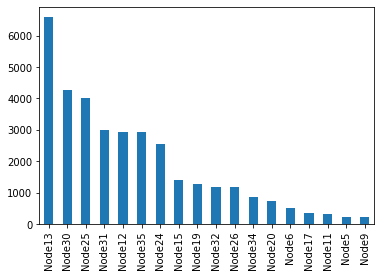

In [33]:
# df_male.nodes.value_counts().plot(kind='bar')

<AxesSubplot:>

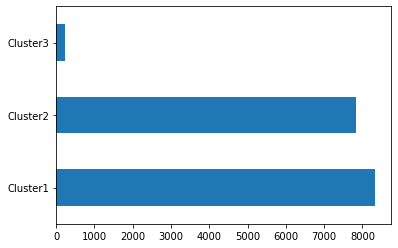

In [35]:
# df_female.clusters.value_counts().plot(kind='barh')

In [20]:
# (df_female.clusters.value_counts() / df_female.clusters.count()).plot(kind='barh')

In [10]:
# df_male.age[df_male.clusters == 'Cluster1'].plot.density(color='red')
# df_male.age[df_male.clusters == 'Cluster2'].plot.density(color='green')
# df_male.age[df_male.clusters == 'Cluster3'].plot.density(color='blue')

In [11]:
# df_male.age[df_male.clusters == 'Cluster1'].plot(color='red')

In [12]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# df_male['clusters_num'] = df_male.clusters.str[-1].astype(int)
# sns.lmplot(x='age', y='clusters_num', data=df_male, ci=None, order=7, truncate=False)
# sns.lmplot(x='age', y='clusters_num', data=df_male, ci=None, lowess=True, truncate=False)

In [37]:
results = pd.concat([df_female, df_male], ignore_index=True)
results

,experience,age,governorate,disability,education,gender,nodes,clusters
0,0,20,al_kirk,no_disability,secondary_or_below,female,Node25,Cluster2
1,0,20,irbid,no_disability,secondary_or_below,female,Node12,Cluster2
2,0,20,zarqa,no_disability,secondary_or_below,female,Node22,Cluster2
3,0,20,zarqa,no_disability,bachelor_or_above,female,Node22,Cluster2
4,0,20,zarqa,no_disability,bachelor_or_above,female,Node22,Cluster2
...,...,...,...,...,...,...,...,...
50939,0,20,al_aqaba,no_disability,secondary_or_below,male,Node12,Cluster3
50940,0,20,irbid,no_disability,secondary_or_below,male,Node12,Cluster3
50941,0,20,amman,no_disability,secondary_or_below,male,Node13,Cluster3
50942,0,20,zarqa,no_disability,vocational_training,male,Node13,Cluster3


In [39]:
results.to_csv(DATA_OUTPUT_PATH, index=False)

In [40]:
df = pd.read_csv(DATA_OUTPUT_PATH)[API_CONTRIBUTORS+API_TARGET].convert_dtypes(convert_string=False)
if NODES in df.columns:
    df = df.drop(NODES, axis=1)
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   experience   50944 non-null  Int64 
 1   age          50944 non-null  Int64 
 2   governorate  50944 non-null  object
 3   disability   50944 non-null  object
 4   education    50944 non-null  object
 5   gender       50944 non-null  object
 6   clusters     50944 non-null  object
dtypes: Int64(2), object(5)
memory usage: 2.8+ MB
None


,experience,age,governorate,disability,education,gender,clusters
50939,0,20,al_aqaba,no_disability,secondary_or_below,male,Cluster3
50940,0,20,irbid,no_disability,secondary_or_below,male,Cluster3
50941,0,20,amman,no_disability,secondary_or_below,male,Cluster3
50942,0,20,zarqa,no_disability,vocational_training,male,Cluster3
50943,0,20,al_mafraq,no_disability,secondary_or_below,male,Cluster3


In [49]:
df = build_encoders(df, API_ENCODERS, ['governorate', 'disability', 'education', 'gender']).astype(np.int64)
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   experience   50944 non-null  int64
 1   age          50944 non-null  int64
 2   governorate  50944 non-null  int64
 3   disability   50944 non-null  int64
 4   education    50944 non-null  int64
 5   gender       50944 non-null  int64
 6   clusters     50944 non-null  int64
dtypes: int64(7)
memory usage: 2.7 MB
None


,experience,age,governorate,disability,education,gender,clusters
50939,0,20,1,0,2,1,3
50940,0,20,6,0,2,1,3
50941,0,20,4,0,2,1,3
50942,0,20,12,0,3,1,3
50943,0,20,3,0,2,1,3


In [52]:
# dtt = df[df[GENDER] == 1]
features = df[API_CONTRIBUTORS]
target = np.squeeze(df[API_TARGET])
print(features.shape, target.shape)

x_train,x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50944, 6) (50944,)
(40755, 6) (40755,) (10189, 6) (10189,)


In [53]:
for i in range(2, 13):
    api_model = DecisionTreeClassifier(max_depth=i)
    api_model.fit(features, target)
    
    y_pred = api_model.predict(x_train)
    print(f"Model Accuracy on TRAINING data (having max_depth={i}):", accuracy_score(y_train, y_pred))
    print(classification_report(y_train, y_pred, labels=[0, 1, 2]))
    
    y_pred = api_model.predict(x_test)
    print(f"Model Accuracy on TESTING data (having max_depth={i}):", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, labels=[0, 1, 2]))
    
    print('-' * 100)

Model Accuracy on TRAINING data (having max_depth=2): 0.765034965034965
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.48      0.65     13946
           2       0.67      0.88      0.76     17089

   micro avg       0.74      0.70      0.72     31035
   macro avg       0.56      0.45      0.47     31035
weighted avg       0.82      0.70      0.71     31035

Model Accuracy on TESTING data (having max_depth=2): 0.767101776425557
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.48      0.65      3502
           2       0.66      0.88      0.76      4195

   micro avg       0.74      0.70      0.72      7697
   macro avg       0.55      0.45      0.47      7697
weighted avg       0.82      0.70      0.71      7697

-----------------------------------------------------------------------------------------------

In [54]:
api_model = DecisionTreeClassifier(max_depth=8)
api_model.fit(features, target)

y_pred = api_model.predict(x_train)
print(f"Model Accuracy on TRAINING data:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred, labels=[0, 1, 2]))

y_pred = api_model.predict(x_test)
print(f"Model Accuracy on TESTING data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

Model Accuracy on TRAINING data: 0.997742608268924
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      1.00     13946
           2       0.99      1.00      1.00     17089

   micro avg       1.00      1.00      1.00     31035
   macro avg       0.66      0.66      0.66     31035
weighted avg       1.00      1.00      1.00     31035

Model Accuracy on TESTING data: 0.9975463735400922
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      1.00      3502
           2       0.99      1.00      1.00      4195

   micro avg       1.00      1.00      1.00      7697
   macro avg       0.66      0.66      0.66      7697
weighted avg       1.00      1.00      1.00      7697



|--- feature_0 <= 0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_4 <= 2.50
|   |   |   |--- class: 2
|   |   |--- feature_4 >  2.50
|   |   |   |--- feature_1 <= 25.00
|   |   |   |   |--- class: 3
|   |   |   |--- feature_1 >  25.00
|   |   |   |   |--- feature_2 <= 10.00
|   |   |   |   |   |--- feature_2 <= 4.50
|   |   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_2 >  4.50
|   |   |   |   |   |   |--- feature_2 <= 7.00
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_2 >  7.00
|   |   |   |   |   |   |   |--- feature_2 <= 8.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_2 >  8.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_2 >  10.00
|   |   |   |   |   |--- class: 3
|   |--- feature_5 >  0.50
|   |   |--- feature_4 <=

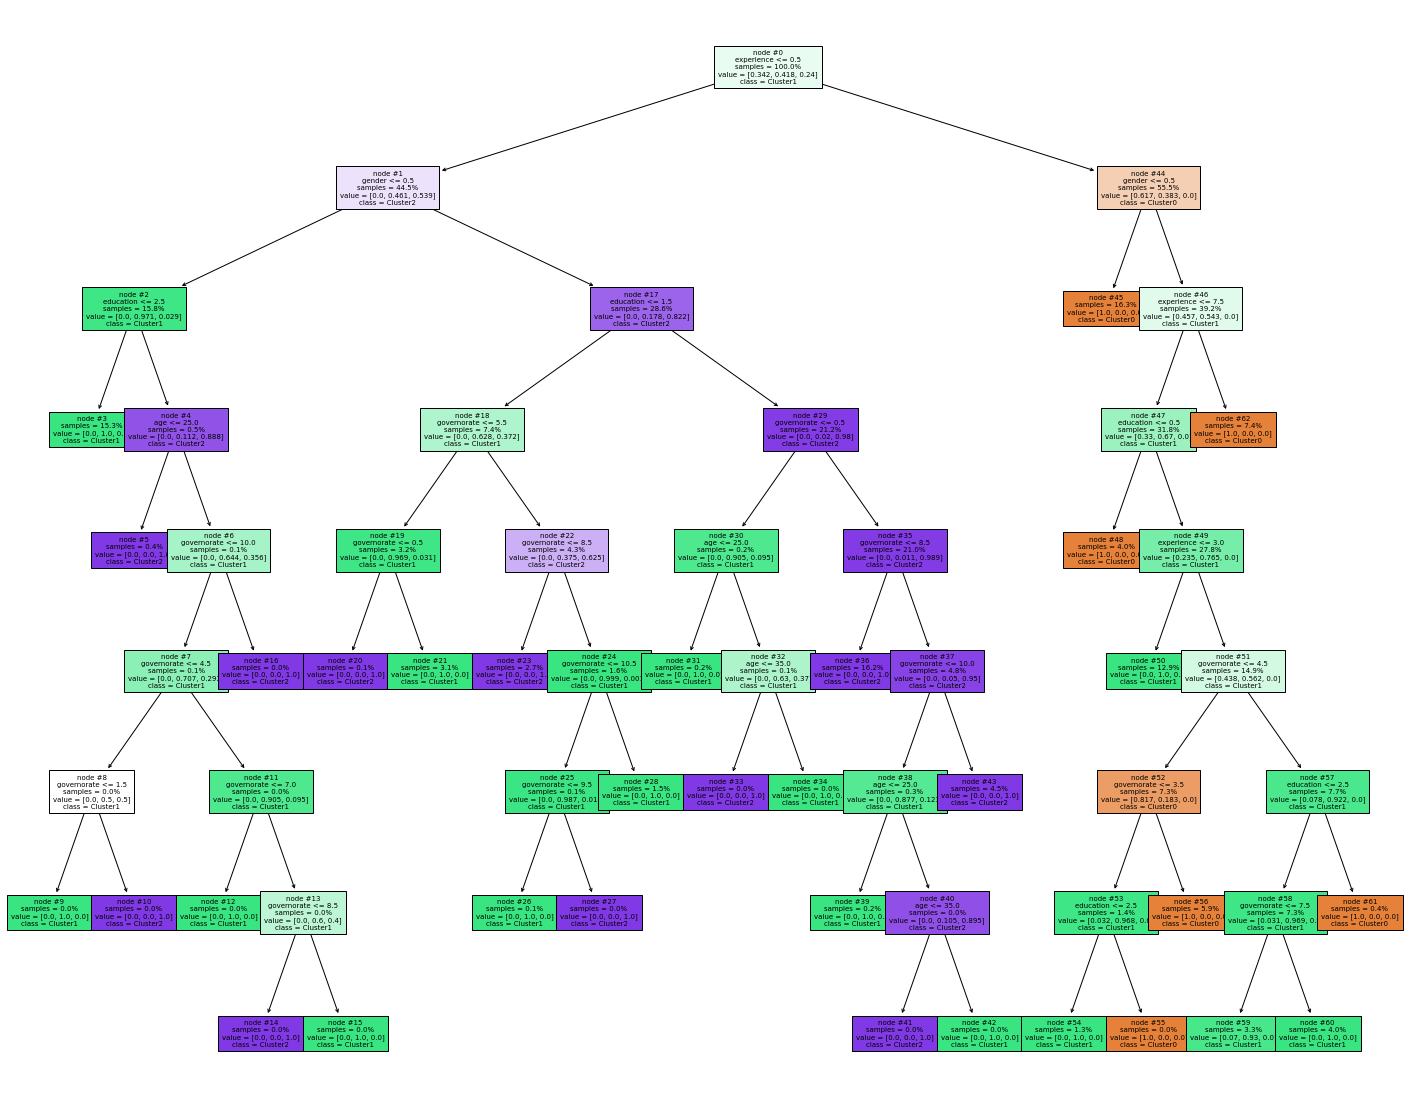

In [56]:
text_representation = tree.export_text(api_model)
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    api_model, 
    feature_names=df.drop(CLUSTER, axis=1).columns,  
    class_names=['Cluster0', 'Cluster1', 'Cluster2', ],
    filled=True,
    proportion=True,
    fontsize=7,
    impurity=False,
    node_ids=True
)